<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+4" color="orange">Simple Linear Regression</font></b></p>
    <p><b><font size="+1" color="white">by Jubril Davies</font></b></p>    
    </div>

* **Import packages**

In [3]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from scipy import linalg
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':12}) #sets global font size

* **Import statsmodel library**

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

* **Load data and import lab-specific functions**

In [5]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

* **Inspecting Objects & Namespaces**

In [5]:
#dir()

---
<div class="alert alert-block" style="background-color: black">
    <p><b><font size="+2" color="white">Introduction</font></b></p>
    </div>
    
---

Simple linear regression is a very straightforward approach for predicting a quantitative **response Y** on the basis of a single **predictor variable X**. It assumes there is an approximate linear relationship between X and Y.

$$
\begin{align}
Y ≈ \beta_{0} + \beta_{1}X.\\
\end{align}
$$

Assumming we are trying to model the relationship between TV advertising and Sales. Our reponse Y will be **Sales** while our predictor variable X will be **TV advertising**.

$$
\begin{align}
Sales ≈ \beta_{0} + \beta_{1}TV.\\
\end{align}
$$

where $𝜷_{0}$ and $𝜷_{1}$ represent the **intercept** and **slope** in the linear model and are known as the model parameters.

Once we have used our training data to estimate the model parameters $\hat\beta_{0}$ and $\hat\beta_{1}$, we can predict future sales on the basis of a particular TV advertising

$$
\begin{align}
\hat y ≈ \hat\beta_{0} + \hat\beta_{1}x.\\
\end{align}
$$


### **Estimating the Coefficients**
***

The goal is to obatin $𝜷_{0}$ and $𝜷_{1}$ such that the linear model fits the available data very well i.e the resulting line is as close to the observational data points really well. The most common approach is to minimize the least squares criterion.

The difference between the observed data and the predicted data is the **residual**

$$
\begin{align}
e_{i} = y_{i} - \hat y_{i}\\
\end{align}
$$

The residual sum of squares which is minimized is thus given as:

$$
\begin{align}
RSS = e_{1}^{2} + e_{2}^{2} +...+ e_{n}^{2}\\
\end{align}
$$

The model parameters or coefficients $𝜷_{0}$ and $𝜷_{1}$ are chosen such that RSS is greatly minimized. The model parameter estimates are:


$$
\begin{align}
\hat \beta_{1} = \frac{∑_{i=1}^{n}\left(x_{i} - \bar x \right)\left(y_{i} - \bar y \right)}{∑_{i=1}^{n}\left(x_{i} - \bar x \right)^{2}}\\
\end{align}
$$


$$
\begin{align}
\hat \beta_{0} = \bar y - \hat \beta_{1}\bar x\\
\end{align}
$$

* **Load the Advertising data and explore the data before making a regression**

In [6]:
Advert = pd.read_csv("../Data/ISLP_Data/Advertising.csv")

* **Let's split the dataset into test and train datasets**. 

We will use scikit-learn's train_test_split() function available through model_selection module to split our dataset into 67% train and 33% test data

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(Advert.iloc[:,0:-3],Advert.iloc[:,-1],test_size=0.33,random_state=42)


* **Explore the data using a scatter plot**

This is to confirm that a linear relationship exists between the dependent and the independent variable.

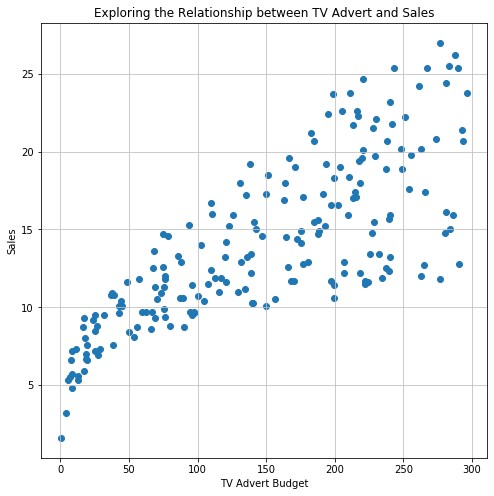

In [8]:
plt.figure(figsize=(8,8));
plt.scatter(Advert['TV'],Advert.sales);
plt.xlabel('TV Advert Budget')
plt.ylabel('Sales')
plt.title('Exploring the Relationship between TV Advert and Sales');
plt.grid(color='silver')

We can observe a strong linear relationship between the TV Advert and the sales as shown by the increase in sales associated with TV Budget. 

* **Now fit the data**. 

That is regress sales onto TV Advert Budget. State clearly the response and predictor variables. Response - Sales and Predictor or dependent Variable - TV Advert.

Since we are assuming that the true relationship between Y and X follows a linear model to model our data:

$$
\begin{align}
y ≈ \beta_{0} + \beta_{1}x + ∊.\\
\end{align}
$$

∊ is the error term and is assummed independent of X. $\beta_{0}$ will be introduced as the intercept term that is the expected value of Y when X = 0. That is the reason for the ones added as constant in the intercept. $\beta_{1}$ is the slope - the average increase in Y associated with a one-unit increase in X. The true relationship may not be linear, there may be other variables responsible for the variation in Y.

These unknown coefficients $\beta_{0}$ and $\beta_{1}$ define the population regression line and we seek to estimate these unknown coefficients using $\hat\beta_{0}$ and $\hat\beta_{1}$

$$
\begin{align}
\hat y ≈ \hat\beta_{0} + \hat\beta_{1}x.\\
\end{align}
$$

* **How far off is our prediction of $\hat\beta_{0} and \hat\beta_{1}$ from the true values of $\beta_{0} and \beta_{1}$**

We answer this question by computing the standard error of $\hat \beta$. The standard error tells us the average amount that this estimate $\hat \beta$ differs from the actual value of $\beta$ 



## **MODELING THE TRAINING DATA - Assessing the accuracy of the Coefficient Estimates**

In [9]:
Y = Y_train
X = pd.DataFrame({'intercept':np.ones(X_train.shape[0]),'TV Advert Training Data':X_train['TV']})
model = sm.OLS(Y,X)
reg_model = model.fit()
reg_model.summary()
#Y = Advert.sales
#X = pd.DataFrame({'intercept':np.ones(Advert.shape[0]),'TV Budget Advert':Advert['TV']})

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     189.5
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           2.73e-27
Time:                        21:35:06   Log-Likelihood:                -350.43
No. Observations:                 134   AIC:                             704.9
Df Residuals:                     132   BIC:                             710.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                   7.0666      0.619     11.409      0.000       5.841       8.292
TV Advert Training Data     0.0482      0.004     13.767      0.000       0.041       0.055
==============================================================================
Omnibus:                        1.859   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.717
Skew:                          -0.173   Prob(JB):                        0.424
Kurtosis:                       2.567   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Analysis**

**Coefficients Estimates & Standard Errors**

From the table of results shown above, the coefficients obtained are $𝜷_{0}$ - **7.06** and $𝜷_{1}$ - **0.048** and their respective standaard errors are **0.619** and **0.004** respectively.Notice that the coefficients are very large relative to their standard errors , so the t-statistics are also large. The probabilities of seeing such values if $H_{0}$ is true are virtually zero. Hence, we can conclude that $\beta_{0} ≠ 0 \text{and} \beta_{1} ≠ 0$.

**Confidence Intervals**

These standard errors are used to compute the confidence intervals.

<div class="alert alert-block" style= "background-color: black">
    <p>&#9672<b><font size="+2" color="white">95% Confidence Intervals</font></b></p>
    <font color="white">A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter.</font>
    </div>

For linear regression, the 95% confidence interval of $𝜷_{1}$ takes the form: $\beta_{1}$ ± 2 .SE ($\hat \beta_{1})$


This is valid only if n-observations are uncorrelated

Similarly a confidence interval for $𝜷_{0}$ takes the form: $\beta_{0}$ ± 2 .SE ($\hat \beta_{0})$

In the case of advertising data, the 95% confidence interval for $\beta_{0}$ is [6.130, 7.935] and the 95% confidence interval for $\beta_{1}$ is [0.042,0.053].

In conclusion, we can say that in the abscence of any advertising, sales will on average, fall somewhere between 6130 and 7935 units. Furthermore, for each 1000 dollar increase in TV advertising, there will be an average increase in slaes of between 42 and 53 units.

**Hypothesis tests**

Standard errors can be used to perform hypothesis tests on the coefficients, the most common being the **null hypothesis**:

$$
\begin{align}
H_{0} : \text{There is no relationship between X and Y} \\
H_{0} : \beta_{1} = 0\\
\end{align}
$$

versus the **alternative hypothesis**

$$
\begin{align}
H_{a} : \text{There is some relationship between X and Y}\\
H_{a} : \beta_{1} ≠ 0\\
\end{align}
$$


Since if $\beta_{1} = 0$ , then our assummed model reduces to $Y = \beta_{0} + ∊$ and X is not associated with Y. To test the null hypothesis, we need to determine whether $\hat \beta_{1}$ or our estimate for $\beta_{1}$ is sufficiently far from zero that we can be confident that $\beta_{1}$ is nonzero.

**How far is far enough?**

This depends on the accuracy of $\hat \beta_{1}$ i.e **it depends on the standard error of** $\beta_{1}$. 

*  If this value is small, then even relatively small values of $\hat \beta_{1}$ may provide a strong evidence that $\beta_{1} ≠ 0$ and hence that a relationship exists between X and Y. 

*  In contrast, if this value is large, then $\hat \beta_{1}$ must be large in absolute value in order for us to reject the null hypothesis. 

In reality, we just compute the t-statistic which measures the number of standard deviations that $\hat \beta_{1}$ is away from zero. 

The p-value is a more apt statistic to portray any association between a response and a predictor. A small p-value infers that there's an association between the predictor and the response. we reject the null hypothesis and thus declare a relationship to exist between X and Y -if the p-value is small enough. Typical p-value cutoffs for rejecting the nul hypothesis are **5% or 1%**.

## **Assessing the Accuracy of the Model**
Once we have established that a relationship exists between the predictor and the response variable, i.e rejected the null hypothesis, we may need to quantify the extent to which the model fits the data.

The quality of a linear regression fit is typically assessed using two related quantities:

* The residual standard error (RSE)
* The $R^{2}$ statistic

**Residual Standard Error**

The RSE is an estimate of the standard deviation of ∊. It is the average amount by which the response will deviate from the true regression line.It is a measure of lack of fit of the model to the data.

$$
\begin{align}
y ≈ \beta_{0} + \beta_{1}x + ∊.\\
\end{align}
$$

if the predictions $\hat y_{i}$ obtained using the model are very close to the true outcome values $y_{i}$ then RSE will be small and we can conclude that the model fits the data very well. 

But if the predictions are very far from the observed values, then RSE may be quite large indicating that the model doesn't fit the data.

$R^{2}$ **Statistic**

Since RSE is measured in units of Y, it is not clear what constitutes a good RSE. The $R^{2}$ statistic provides a measure of fit in the form of proportion i.e the proportion of variance explained by the regression. It takes on values between 0 & 1 and is independent of the scale of Y.

An $R^{2}$ statistic that is close to 1 indicates that a large proportion of the variability in the response is explained by the regression. A number near 0 indicates that the regression does not explain much of the variability in the response; this might occur because the linear model is wrong, or the error variance σ2 is high, or both.

* Plot our Regression Model over our actual Training data

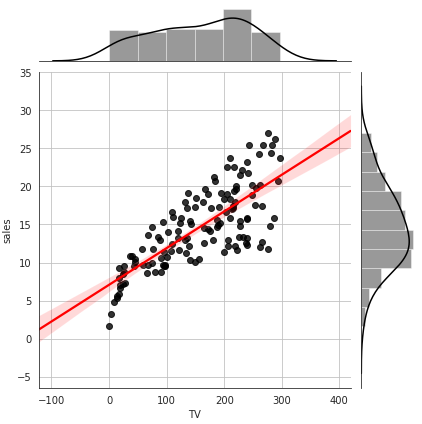

In [10]:
#sb.regplot(X_train['TV'],Y_train,data=None,line_kws={"color":"r"},fit_reg=True,marker="o",label="TV",ci=68);
#plt.vlines(X_train['TV'],Y_train,results.resid);
with sb.axes_style('white'):
    sb.jointplot(X_train['TV'],Y_train,data=None,kind='reg',color="black",joint_kws={'line_kws':{'color':'red'}});
    plt.grid(color='silver')
    plt.savefig('Assumed Linear Regression.png')

# **ASSESSING THE MODEL ACCURACY - RESIDUAL ANALYSIS**

Residual is the difference between the observed and predicted variable. 
### **1. Residuals vs the Predicted values Plot**

This plot helps to check for linearity and homoscedasticity in the data. This plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable, and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship.

A regression model that is nicely fit to the data will display some randomness. This is from the homoscedasticity assumption of regression modeling. **A scatter plot between the residuals and the predicted values is used to confirm this assumption**.Any pattern observed stems from a violation of this property and gives a poor fitting model.

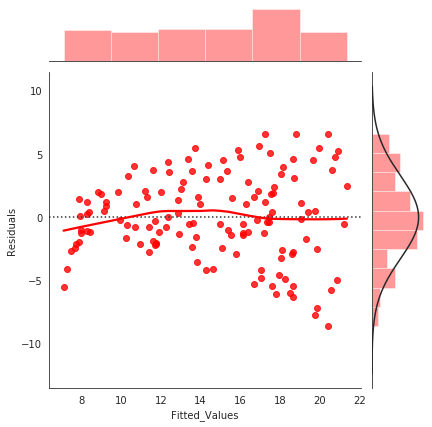

In [11]:
fitted_values = pd.Series(reg_model.fittedvalues, name="Fitted_Values")
residuals = pd.Series(reg_model.resid, name="Residuals")
#sb.regplot(fitted_values,residuals,fit_reg=False,color='red');
with sb.axes_style('white'):
    sb.jointplot(fitted_values,residuals,data=None,kind='resid',color="red",lowess=True);

Some non-linearity is observed in the residual-fitted values plot above. This does not show any randomness but some pattern. This shows that there may be a non-linear relationship between the sales and the TV advert budget. 

### **2. Plot of the Normalized Residuals vs Predicted Values**

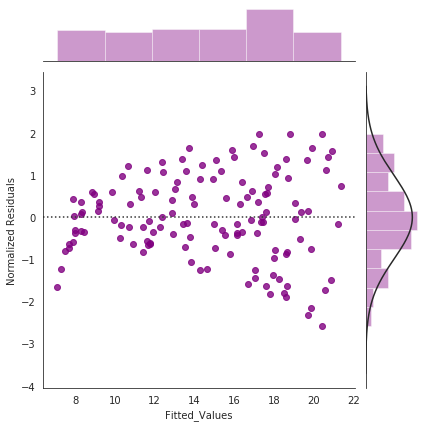

In [12]:
norm_residuals = pd.Series(reg_model.resid_pearson, name="Normalized Residuals")
#sb.regplot(fitted_values,norm_residuals,fit_reg=False,color='black');
with sb.axes_style('white'):
    sb.jointplot(fitted_values,norm_residuals,data=None,kind='resid',color="purple");

### **3. Normal Q-Q Plot**

This plot shows if the residuals are normally distributed. Do they follow a straight line or deviate severely? This is a plot under the statsmodels api

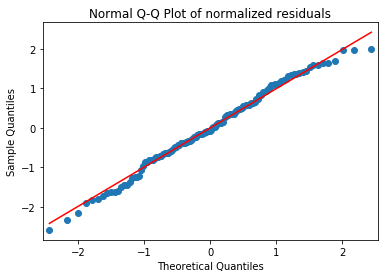

In [13]:
sm.qqplot(norm_residuals, line='s')
plt.title("Normal Q-Q Plot of normalized residuals")
plt.show()

### **4. Scale & Location Plot** 

This is also called the spread-location plot.This plot shows if the residuals are spread equally along the ranges of predictors. This is how to confirm the assumption of equal variance or homoscedastity. It is good you see a horizontal line with equally random spaced points.

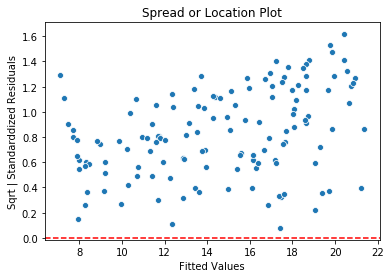

In [14]:
sqrt_abs_standardized_residuals = np.sqrt(np.abs(reg_model.get_influence().resid_studentized_internal))

#Plotting
sb.scatterplot(x = fitted_values, y=sqrt_abs_standardized_residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt | Standarddized Residuals')
plt.title('Spread or Location Plot')
plt.show()

A closer look at the plot shows that the residuals are randomly spread

### **5. Investigating the performance of the Regression Model using Cook-Distance Plot & Influence Plot**

The cook distance plot identifies outliers and influential points that may significantly affect the regression model.

* Get the influence using the influence method from the regression model and calculate the cooks distance

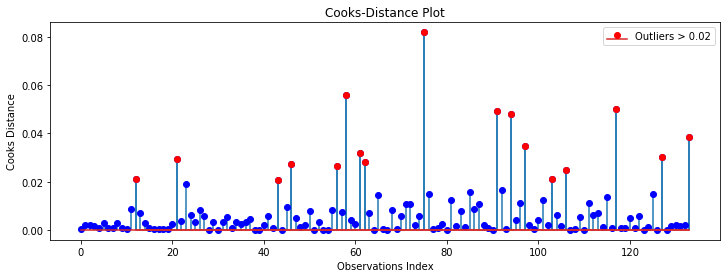

In [15]:
influence = reg_model.get_influence()
(cooks,_)=influence.cooks_distance

#Make a stem plot of the cooks distance
plt.figure(figsize=(12,4))
plt.stem(np.arange(len(X_train['TV'])),cooks,markerfmt='bo',use_line_collection=True)
plt.xlabel("Observations Index")
plt.ylabel("Cooks Distance")
plt.title("Cooks-Distance Plot")

# Select outliers greater than a cooks distance of 0.015
cooks[cooks>0.02]
np.arange(len(X_train['TV']))[cooks>0.02]
# Visualize them on the stem plot 
plt.stem(np.arange(len(X_train['TV']))[cooks>0.02],cooks[cooks>0.02],markerfmt='ro',label='Outliers > 0.02',use_line_collection=True)
plt.legend()
plt.show()

Looking at the stem plot, the comparative influence of each data point can be understood

## **4b. Influence Plot - Residual vs Leverage**

This plot helps us to find influential subjects if there are any. Not all outliers are influential in a linear regression analysis. Even though data might have extreme values, they may not be influential enough if we include or exclude them in the analysis.If they follow the trend of the data, they probably would not be influential if included in the analysis but in an extreme case where the outliers do not get along with the trend of the data. Some cases may be influential even if they are within a reasonable range of values. 

In a residual-leverage plot, we look for outliers at the upper-right corner or at the lower-right corner.Those spots are the places where cases might be influential against a regression line. These are cases with high Cook's-distance scores and are thus influential to the regression results.The regression will be altered if we exclude those cases.

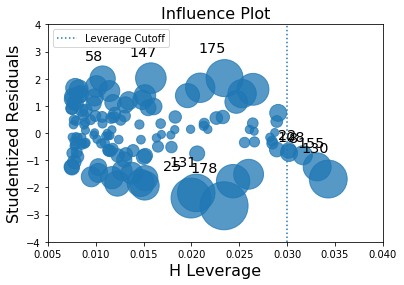

In [16]:
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(reg_model,criterion="cooks")

#Obtain the leverage
leverage = pd.Series(OLSInfluence(reg_model).influence, name="Leverage")
leverage_cutoff = 0.03
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.xlim([0.005,0.04])
plt.ylim([-4,4])
plt.legend()
plt.show()

* Plot the leverage against the normalized residuals 


leverage_cutoff is the dotted blue line at  0.06716417910447761


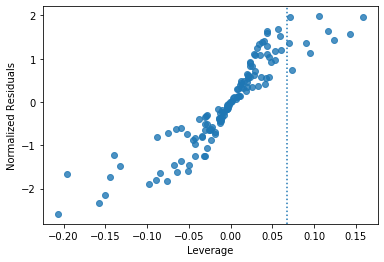

In [17]:
sb.regplot(leverage, norm_residuals,  fit_reg=False);
n=X_train.shape[0]
k=X_train.shape[1]
leverage_cutoff =3*(k+1)/n
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
print("\nleverage_cutoff is the dotted blue line at ",leverage_cutoff)

### **Analysis Continued: Making Predictions with our Model**

Let's setup a dataframe containing some TV Advert values for which we want to predict the sales. We could use our test data - X_test to see if this gives us Y_test. We just call the predict method of our model


In [18]:
test_data = pd.DataFrame({'Intercept':np.ones(X_test.shape[0]),'TV Advert Test Data': X_test['TV']})


In [19]:
reg_model.predict(test_data)

95     14.941645
15     16.489652
30     21.191542
158     7.630809
128    17.690443
         ...    
97     15.983295
31     12.511130
12      8.214326
35     21.085448
119     8.002138
Length: 66, dtype: float64

* Let's plot this along side our Y_test data to see if our model accuractely predicts our test data

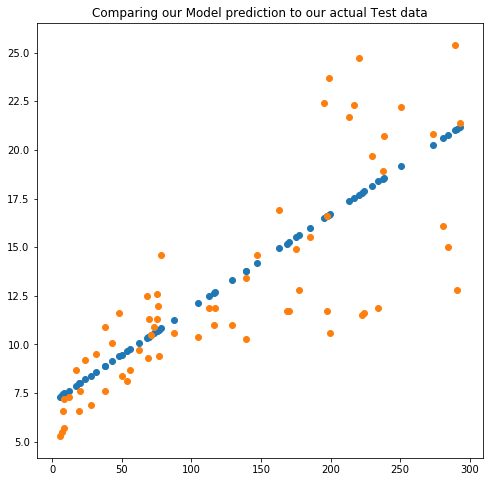

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(X_test['TV'],reg_model.predict(test_data))
plt.scatter(X_test['TV'],Y_test)
plt.title('Comparing our Model prediction to our actual Test data');